<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#系統樹読み込み" data-toc-modified-id="系統樹読み込み-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>系統樹読み込み</a></span></li><li><span><a href="#情報読み込み" data-toc-modified-id="情報読み込み-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>情報読み込み</a></span><ul class="toc-item"><li><span><a href="#ウイルスに関する情報の表を取得" data-toc-modified-id="ウイルスに関する情報の表を取得-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ウイルスに関する情報の表を取得</a></span></li></ul></li><li><span><a href="#系統樹にヒートマップをつける" data-toc-modified-id="系統樹にヒートマップをつける-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>系統樹にヒートマップをつける</a></span></li><li><span><a href="#ウイルス名と系統樹" data-toc-modified-id="ウイルス名と系統樹-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ウイルス名と系統樹</a></span></li></ul></div>

# read tree file

In [1]:
library(ggtree)
library(ape)
library(phytools)
library(dplyr)

ggtree v3.6.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, please cite
the appropriate paper(s):

Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam.
ggtree: an R package for visualization and annotation of phylogenetic
trees with their covariates and other associated data. Methods in
Ecology and Evolution. 2017, 8(1):28-36. doi:10.1111/2041-210X.12628

Guangchuang Yu, Tommy Tsan-Yuk Lam, Huachen Zhu, Yi Guan. Two methods
for mapping and visualizing associated data on phylogeny using ggtree.
Molecular Biology and Evolution. 2018, 35(12):3041-3043.
doi:10.1093/molbev/msy194

S Xu, Z Dai, P Guo, X Fu, S Liu, L Zhou, W Tang, T Feng, M Chen, L
Zhan, T Wu, E Hu, Y Jiang, X Bo, G Yu. ggtreeExtra: Compact
visualization of richly annotated phylogenetic data. Molecular Biology
and Evolution. 2021, 38(9):4039-4042. doi: 10.1093/molbev/msab166 


Attaching package: 'ape'


The following object is masked from 'package

In [3]:
virus = "Coronaviridae"
virus_1 = "sarbecovirus"

In [4]:
nwk_f <- "input_examples/Coronaviridae/Coronaviridae.treefile"

In [5]:
phylo <- read.tree(nwk_f)

rooted <- midpoint.root(phylo)
phylo <- ladderize(rooted, F)

In [6]:
phylo


Phylogenetic tree with 643 tips and 642 internal nodes.

Tip labels:
  LC663783, LC706864, LC716900, OM912685, OM912689, ON950740, ...

Rooted; includes branch lengths.

# read metadata

In [7]:
label_f <- "input_examples/final_dataset_phylogenetic_tree_label.txt"

In [14]:
data <- read.csv(file = label_f, sep="\t", encoding='UTF-8', fill=TRUE, quote="",
                          stringsAsFactor=FALSE, header=TRUE)

data$Family[data$Family == "sarbecovirus"] <- "Coronaviridae"
data$Family[data$Family == "influenza_virus"] <- "Orthomyxoviridae"

# extract target viral data
filtered_data <- data %>%
  filter(Family == virus)

# filtered by columns 
col_l <- c("virus_ID", "Genus", "host_label", "dataset", "dnabert", "vibe", "deepac", "kNN", "zoonotic_rank", "Family")
df_seq_info = filtered_data[, col_l]

# remove duplicates
df_seq_info <- unique(df_seq_info)
row.names(df_seq_info) <- df_seq_info$virus_ID

head(df_seq_info)

,virus_ID,Genus,host_label,dataset,dnabert,vibe,deepac,kNN,zoonotic_rank,Family
,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AB691764,AB691764,Alphacoronavirus,1,past,0.99325232,0.99314380,0.9997274,1.00,0.91799506,Coronaviridae
AB691765,AB691765,Alphacoronavirus,1,past,0.99390477,0.99120824,0.9997108,1.00,0.90106684,Coronaviridae
AB691766,AB691766,Alphacoronavirus,1,past,0.99342929,0.99370069,0.9997139,1.00,0.90497556,Coronaviridae
AB691767,AB691767,Alphacoronavirus,1,past,0.99868255,0.99934029,0.9998334,1.00,0.89056704,Coronaviridae
BS007339,BS007339,CoV2-related,1,future,0.06338073,0.02466491,0.2474081,0.06,0.06043783,Coronaviridae
BS007341,BS007341,CoV2-related,1,future,0.06611981,0.03390417,0.2642916,0.08,0.07355008,Coronaviridae


In [15]:
# Check for duplicate virus_IDs, including the first occurrence
duplicates <- duplicated(df_seq_info$virus_ID) | duplicated(df_seq_info$virus_ID, fromLast = TRUE)

# Show rows with duplicate virus_IDs
df_seq_info[duplicates, ]

virus_ID,Genus,host_label,dataset,dnabert,vibe,deepac,kNN,zoonotic_rank,Family
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>


# extract tables

In [16]:
col_l <- c("host_label")
df_host  <- as.data.frame(df_seq_info[, col_l])
rownames(df_host) <- rownames(df_seq_info)
colnames(df_host) <- c("Host")
head(df_host)

,Host
,<dbl>
AB691764,1
AB691765,1
AB691766,1
AB691767,1
BS007339,1
BS007341,1


In [17]:
col_l <- c("Genus")
df_genus  <- as.data.frame(df_seq_info[, col_l])
colnames(df_genus) <- c("Genus")
rownames(df_genus) <- rownames(df_seq_info)

In [18]:
col_l <- c("dataset")
df_dataset  <- as.data.frame(df_seq_info[, col_l])
colnames(df_dataset) <- c("Datset")
rownames(df_dataset) <- rownames(df_seq_info)

In [19]:
col_l <- c("dnabert")
df_dnabert <- as.data.frame(df_seq_info[, col_l])
colnames(df_dnabert) <- c("DNABERT")
rownames(df_dnabert) <- rownames(df_seq_info)

In [20]:
col_l <- c("vibe")
df_vibe <- as.data.frame(df_seq_info[, col_l])
colnames(df_vibe) <- c("ViBE")
rownames(df_vibe) <- rownames(df_seq_info)

In [21]:
col_l <- c("kNN")
df_kNN <- as.data.frame(df_seq_info[, col_l])
colnames(df_kNN) <- c("human\nVirus Finder")
rownames(df_kNN) <- rownames(df_seq_info)

In [22]:
col_l <- c("deepac")
df_deepac <- as.data.frame(df_seq_info[, col_l])
colnames(df_deepac) <- c("Deepac")
rownames(df_deepac) <- rownames(df_seq_info)

In [23]:
col_l <- c("zoonotic_rank")
df_zoonotic_rank <- as.data.frame(df_seq_info[, col_l])
colnames(df_zoonotic_rank) <- c("Zoonotic\nrank")
rownames(df_zoonotic_rank) <- rownames(df_seq_info)

# plot tree and heatmap

In [24]:
library(ggplot2)
library(ggnewscale)

p0 <- ggtree(phylo) + theme_tree2()
p0$data$x = p0$data$x +2

In [25]:
p1 <- gheatmap(p0, 
               df_genus, offset=1, width=0.5,
        colnames=FALSE)  +
         scale_fill_viridis_d(option = "H", name="Virus\ngenus", na.value = "white") + scale_x_ggtree() 

p2 <- p1 + new_scale_fill()
p2 <- gheatmap(p2, 
               df_host, offset=2, width=0.5,
               colnames=FALSE) + 
                scale_fill_viridis_c(name="Host\nspecies", na.value = "white") + scale_x_ggtree() 

p3 <- p2 + new_scale_fill()
p3 <- gheatmap(p3, 
               df_dataset, offset=3, width=0.5,
               colnames=FALSE) + 
             scale_fill_viridis_d(option = "G", name="Dataset", na.value = "white") + scale_x_ggtree() 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


In [27]:
p4 <- p3 + new_scale_fill()
p4 <- gheatmap(p4, 
               df_dnabert, offset=4, width=0.5,
               colnames=FALSE) + 
                scale_fill_viridis_c(option = "plasma", name="DNABERT", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p5 <- p4 + new_scale_fill()
p5 <- gheatmap(p5, 
               df_vibe, offset=5, width=0.5,
               colnames=FALSE) +
            scale_fill_viridis_c(option = "plasma", name="ViBE", na.value="gray50", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p6 <- p5 + new_scale_fill()
p6 <- gheatmap(p6, 
               df_kNN, offset=6, width=0.5,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="human\nVirusFinder", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p7 <- p6 + new_scale_fill()
p7 <- gheatmap(p7, 
               df_deepac, offset=7, width=0.5,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="Deepac", na.value = "white", limits=c(0,1)) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

p9 <- p7 + new_scale_fill()
p9 <- gheatmap(p7, 
               df_zoonotic_rank, offset=8, width=0.5,
               colnames=FALSE) + 
             scale_fill_viridis_c(option = "plasma", name="Zoonotic\nrank", na.value = "white", limits=c(0,1)) 

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Scale for fill is already present.
Adding another scale for fill, which will replace the existing

In [32]:
p9 <- p9 + theme_tree2() +
    guides(shape = guide_legend(override.aes = list(size = 2))) + 
    scale_x_ggtree() + 
    scale_y_continuous(expand=c(0, 0.3))

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


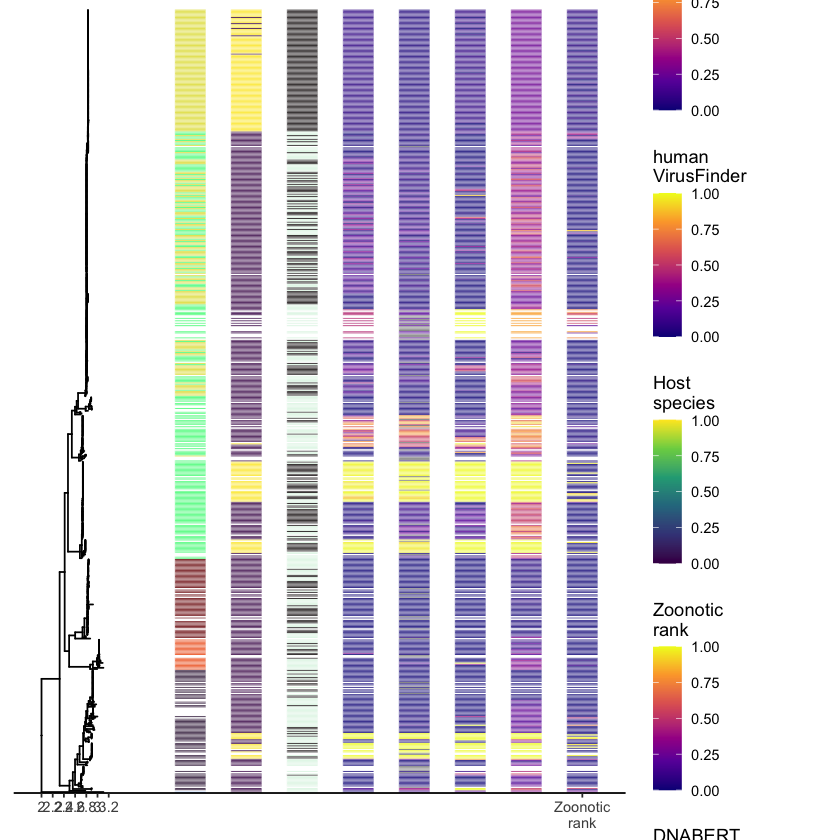

In [33]:
p9